## Observations and Insights 

In [189]:
%matplotlib inline

In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata,study_results, how='outer')
# Display the data table for preview
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [191]:
# Checking the number of mice.
num_mice = all_data['Mouse ID'].count()
num_mice

1893

In [192]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_data_copy = all_data.copy()
duplicates = all_data_copy[all_data_copy.duplicated(['Mouse ID', 'Timepoint'])]
duplicates['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [193]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [194]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexes = duplicates.index.to_list()
clean_all_data = all_data_copy.drop(all_data_copy.index[[indexes]])
clean_all_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [195]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_all_data['Mouse ID'].count()
clean_num_mice

1888

## Summary Statistics

In [196]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = round(clean_all_data.describe(),2)
stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_trx_mean = round(clean_all_data.groupby('Drug Regimen').mean(),2)
drug_trx_mean



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.46,19.97,21.57,40.68,0.71
Ceftamin,13.25,27.40,19.75,52.59,1.18
Infubinol,16.23,27.20,18.17,52.88,0.96
Ketapril,15.66,27.86,19.71,55.24,1.30
Naftisol,12.00,27.17,19.62,54.33,1.18
Placebo,10.73,27.93,18.67,54.03,1.44
Propriva,10.57,27.08,17.08,52.39,1.00
Ramicane,10.68,19.68,21.43,40.22,0.55
Stelasyn,12.78,27.86,19.23,54.23,0.87


In [197]:
drug_trx_median = round(clean_all_data.groupby('Drug Regimen').median(),2)
drug_trx_median

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.56,0.0
Ceftamin,12.0,28.0,20.0,51.78,1.0
Infubinol,20.0,27.0,15.0,51.82,1.0
Ketapril,18.0,28.0,20.0,53.70,1.0
Naftisol,9.0,27.0,20.0,52.51,1.0
Placebo,10.0,28.0,15.0,52.29,1.0
Propriva,8.0,26.0,15.0,50.91,1.0
Ramicane,9.0,19.0,20.0,40.67,0.0
Stelasyn,14.0,28.0,20.0,52.43,1.0


In [198]:
drug_trx_stdev = round(clean_all_data.groupby('Drug Regimen').std(),2)
drug_trx_stdev

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.72,2.73,14.38,4.99,0.85
Ceftamin,8.07,1.58,14.28,6.27,1.18
Infubinol,7.51,2.18,13.47,6.57,1.03
Ketapril,6.02,1.84,14.03,8.28,1.39
Naftisol,6.72,1.50,14.18,8.13,1.22
Placebo,6.35,1.84,13.89,7.82,1.34
Propriva,7.19,1.69,13.57,6.57,1.09
Ramicane,5.95,3.24,14.28,4.85,0.69
Stelasyn,7.94,1.64,13.84,7.71,0.97


In [199]:
drug_trx_sterr = round(clean_all_data.groupby('Drug Regimen').sem(),2)
drug_trx_sterr

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,0.51,0.18,0.95,0.33,0.06
Ceftamin,0.60,0.12,1.07,0.47,0.09
Infubinol,0.56,0.16,1.01,0.49,0.08
Ketapril,0.44,0.13,1.02,0.60,0.10
Naftisol,0.49,0.11,1.04,0.60,0.09
Placebo,0.47,0.14,1.03,0.58,0.10
Propriva,0.58,0.14,1.09,0.53,0.09
Ramicane,0.39,0.21,0.95,0.32,0.05
Stelasyn,0.59,0.12,1.03,0.57,0.07


In [200]:
# Assemble the resulting series into a single summary dataframe.
drug_trx_stats = drug_trx_mean.join(drug_trx_median, on= 'Drug Regimen',lsuffix="_Mean", rsuffix="_Median")
drug_trx_stats = drug_trx_stats.join(drug_trx_stdev, on= 'Drug Regimen',lsuffix="_Median", rsuffix="_StDev")
drug_trx_stats = drug_trx_stats.join(drug_trx_sterr, on= 'Drug Regimen',lsuffix="_StDev", rsuffix="_StErr")
drug_trx_stats = drug_trx_stats.rename(columns = {'Age_months_Mean': 'Mean Age in Months', 'Weight (g)_Mean': 'Mean Weight (g)','Timepoint_Mean': 'Mean Timepoint', 'Tumor Volume (mm3)_Mean': 'Mean Tumor Volume (mm3)','Metastatic Sites_Mean': 'Mean Metastatic Sites', 'Age_months_Median': 'Median Age in Months', 'Weight (g)_Median': 'Median Weight (g)','Timepoint_Median': 'Median Timepoint', 'Tumor Volume (mm3)_Median': 'Median Tumor Volume (mm3)','Metastatic Sites_Median': 'Median Metastatic Sites', 'Age_months_StDev': 'StDev Age in Months', 'Weight (g)_StDev': 'StDev Weight (g)','Timepoint_StDev': 'StDev Timepoint', 'Tumor Volume (mm3)_StDev': 'StDev Tumor Volume (mm3)','Metastatic Sites_StDev': 'StDev Metastatic Sites', 'Age_months_StErr': 'StErr Age in Months', 'Weight (g)_StErr': 'StErr Weight (g)','Timepoint_StErr': 'StErr Timepoint', 'Tumor Volume (mm3)_StErr': 'StErr Tumor Volume (mm3)','Metastatic Sites_StErr': 'StErr Metastatic Sites'})
drug_trx_stats

,Mean Age in Months,Mean Weight (g),Mean Timepoint,Mean Tumor Volume (mm3),Mean Metastatic Sites,Median Age in Months,Median Weight (g),Median Timepoint,Median Tumor Volume (mm3),Median Metastatic Sites,StDev Age in Months,StDev Weight (g),StDev Timepoint,StDev Tumor Volume (mm3),StDev Metastatic Sites,StErr Age in Months,StErr Weight (g),StErr Timepoint,StErr Tumor Volume (mm3),StErr Metastatic Sites
Drug Regimen,,,,,,,,,,,,,,,,,,,,
Capomulin,13.46,19.97,21.57,40.68,0.71,16.5,20.5,20.0,41.56,0.0,7.72,2.73,14.38,4.99,0.85,0.51,0.18,0.95,0.33,0.06
Ceftamin,13.25,27.40,19.75,52.59,1.18,12.0,28.0,20.0,51.78,1.0,8.07,1.58,14.28,6.27,1.18,0.60,0.12,1.07,0.47,0.09
Infubinol,16.23,27.20,18.17,52.88,0.96,20.0,27.0,15.0,51.82,1.0,7.51,2.18,13.47,6.57,1.03,0.56,0.16,1.01,0.49,0.08
Ketapril,15.66,27.86,19.71,55.24,1.30,18.0,28.0,20.0,53.70,1.0,6.02,1.84,14.03,8.28,1.39,0.44,0.13,1.02,0.60,0.10
Naftisol,12.00,27.17,19.62,54.33,1.18,9.0,27.0,20.0,52.51,1.0,6.72,1.50,14.18,8.13,1.22,0.49,0.11,1.04,0.60,0.09
Placebo,10.73,27.93,18.67,54.03,1.44,10.0,28.0,15.0,52.29,1.0,6.35,1.84,13.89,7.82,1.34,0.47,0.14,1.03,0.58,0.10
Propriva,10.57,27.08,17.08,52.39,1.00,8.0,26.0,15.0,50.91,1.0,7.19,1.69,13.57,6.57,1.09,0.58,0.14,1.09,0.53,0.09
Ramicane,10.68,19.68,21.43,40.22,0.55,9.0,19.0,20.0,40.67,0.0,5.95,3.24,14.28,4.85,0.69,0.39,0.21,0.95,0.32,0.05
Stelasyn,12.78,27.86,19.23,54.23,0.87,14.0,28.0,20.0,52.43,1.0,7.94,1.64,13.84,7.71,0.97,0.59,0.12,1.03,0.57,0.07


In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_stats= drug_trx_stats[['Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)','StDev Tumor Volume (mm3)','StErr Tumor Volume (mm3)']]
drug_tumor_stats
# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),StDev Tumor Volume (mm3),StErr Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.39,50.91,6.57,0.53
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


In [202]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor = {'Tumor Volume (mm3)':['mean', 'median','std','sem']}
tumor_stats = clean_all_data.groupby(['Drug Regimen']).agg(agg_tumor).round(2)
tumor_stats

Tumor Volume (mm3)                   
                           mean median   std   sem
Drug Regimen                                      
Capomulin                 40.68  41.56  4.99  0.33
Ceftamin                  52.59  51.78  6.27  0.47
Infubinol                 52.88  51.82  6.57  0.49
Ketapril                  55.24  53.70  8.28  0.60
Naftisol                  54.33  52.51  8.13  0.60
Placebo                   54.03  52.29  7.82  0.58
Propriva                  52.39  50.91  6.57  0.53
Ramicane                  40.22  40.67  4.85  0.32
Stelasyn                  54.23  52.43  7.71  0.57
Zoniferol                 53.24  51.82  6.97  0.52

## Bar and Pie Charts

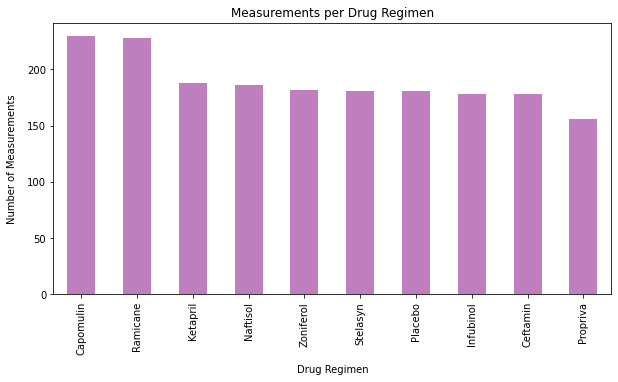

In [203]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_all_data['Drug Regimen'].value_counts().plot(kind='bar', color = 'purple', alpha=0.5, figsize=(10,5))
plt.xlabel('Drug Regimen', labelpad=10)
plt.ylabel('Number of Measurements', labelpad=10)
plt.title('Measurements per Drug Regimen')
plt.show()


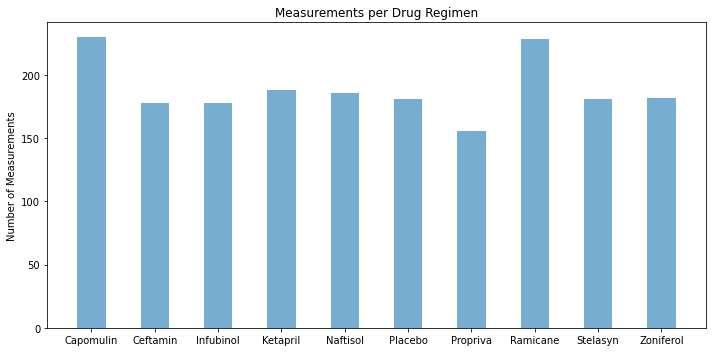

In [231]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(10,5))
counts = clean_all_data.groupby(['Drug Regimen']).count()['Timepoint']
xlabels = counts.index.values
x = np.arange(len(xlabels))
plt.bar(x,counts, align='center', alpha=0.6, width=0.45)
plt.xticks(x,xlabels)
plt.ylabel("Number of Measurements")
plt.title('Measurements per Drug Regimen')

plt.tight_layout()


plt.show()



In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [171]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [172]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [173]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [174]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [175]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
